In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from mlr.MLR import MyLinearRegression as mlr
import numpy as np
import statsmodels.api as sm



In [63]:
dataset1 = pd.read_csv('Final.csv')

dataset1 = dataset1.dropna()

In [64]:
dataset1.describe()

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,1319.219288,3.878342,-0.142041,-0.416439,-0.387974,0.217212,0.337544,0.186445
std,980.267195,0.459455,0.921044,0.948658,1.085082,1.001678,1.025913,1.181329
min,0.000000,2.915000,-2.560963,-2.902871,-2.494080,-1.388262,-2.748250,-2.025494
25%,435.250000,3.521250,-0.798378,-1.135268,-1.494532,-0.340511,0.070310,-0.535899
50%,1141.000000,3.838500,-0.062172,-0.244825,0.030251,-0.069019,0.195092,-0.072568
75%,2139.500000,4.205750,0.573802,0.363064,0.603821,0.522277,0.794019,0.406326
max,3455.000000,5.085000,1.789119,1.418183,1.235949,5.710774,6.465403,4.233408


In [65]:
X = dataset1.drop(columns = ['d180N'])
y = dataset1.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment'])

In [66]:
model = mlr()

In [67]:
model.ingest_data(X,y)

In [68]:
model.fit()

In [69]:
feature_cols = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment']
target_col = 'd180N'

In [70]:
model.fit_dataframe(X=feature_cols,y = target_col,dataframe=dataset1)

In [71]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  1.0
Adjusted R-squared:  1.0
MSE:  8.270168316240136e-20


In [72]:
model.print_metrics()

sse:     0.0000
sst:     1476.9281
mse:     0.0000
r^2:     1.0000
adj_r^2: 1.0000
AIC:     -71582.2381
BIC:     -71538.5358


In [73]:
model.ingest_data(X,y)
model.corrcoef()

array([[ 1.        , -0.64347835,  0.47175925,  0.91569981, -0.67487228,
        -0.87450456, -0.42626943],
       [-0.64347835,  1.        , -0.74295473, -0.58849492,  0.50060881,
         0.55561262,  0.31772944],
       [ 0.47175925, -0.74295473,  1.        ,  0.43375291, -0.5709339 ,
        -0.50878175, -0.10103377],
       [ 0.91569981, -0.58849492,  0.43375291,  1.        , -0.64930421,
        -0.78003198, -0.32732153],
       [-0.67487228,  0.50060881, -0.5709339 , -0.64930421,  1.        ,
         0.74883373,  0.01020069],
       [-0.87450456,  0.55561262, -0.50878175, -0.78003198,  0.74883373,
         1.        ,  0.3165047 ],
       [-0.42626943,  0.31772944, -0.10103377, -0.32732153,  0.01020069,
         0.3165047 ,  1.        ]])

In [74]:
model.covar()

array([[ 9.60923773e+05, -2.89815101e+02,  4.38707193e+02,
         9.74002381e+02, -6.62665235e+02, -8.79462127e+02,
        -4.93627503e+02],
       [-2.89815101e+02,  2.11098531e-01, -3.23828314e-01,
        -2.93391653e-01,  2.30392969e-01,  2.61893851e-01,
         1.72452998e-01],
       [ 4.38707193e+02, -3.23828314e-01,  8.99952780e-01,
         4.46493032e-01, -5.42530081e-01, -4.95167327e-01,
        -1.13226244e-01],
       [ 9.74002381e+02, -2.93391653e-01,  4.46493032e-01,
         1.17740223e+00, -7.05730321e-01, -8.68331245e-01,
        -4.19573146e-01],
       [-6.62665235e+02,  2.30392969e-01, -5.42530081e-01,
        -7.05730321e-01,  1.00335879e+00,  7.69527462e-01,
         1.20705875e-02],
       [-8.79462127e+02,  2.61893851e-01, -4.95167327e-01,
        -8.68331245e-01,  7.69527462e-01,  1.05249777e+00,
         3.83584850e-01],
       [-4.93627503e+02,  1.72452998e-01, -1.13226244e-01,
        -4.19573146e-01,  1.20705875e-02,  3.83584850e-01,
         1.3955370

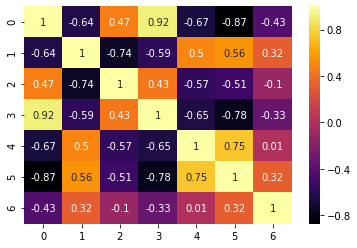

In [75]:
model.corrplot(cmap='inferno',annot=True)

In [76]:
model.ftest()

(2.5394983271480096e+21, 0.0)

In [77]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: const       0.000000
Age         0.976966
d180        0.000000
L*          0.721312
SST         0.593984
Alkane      0.381178
Alkanol     0.278478
Sediment    0.185366
dtype: float64
t-test values: const       6.440230e+10
Age         2.887687e-02
d180       -7.424420e+10
L*         -3.567633e-01
SST        -5.331709e-01
Alkane      8.759512e-01
Alkanol    -1.084085e+00
Sediment   -1.324939e+00
dtype: float64
Standard errors: const       1.185154e-10
Age         2.524761e-14
d180        2.700071e-11
L*          1.212753e-11
SST         1.632346e-11
Alkane      1.210898e-11
Alkanol     1.599846e-11
Sediment    7.264320e-12
dtype: float64


In [78]:
model.conf_int()

,0,1
const,7.632662e+00,7.632662e+00
Age,-4.878989e-14,5.024803e-14
d180,-2.004646e+00,-2.004646e+00
L*,-2.811278e-11,1.945946e-11
SST,-4.071894e-11,2.331255e-11
Alkane,-1.314287e-11,3.435663e-11
Alkanol,-4.872198e-11,1.403462e-11
Sediment,-2.387253e-11,4.622969e-12


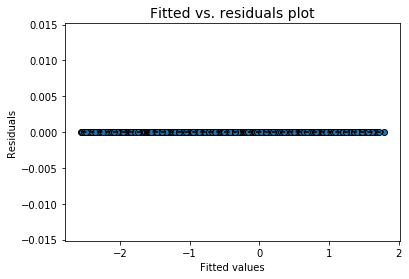

In [79]:
model.fitted_vs_residual()

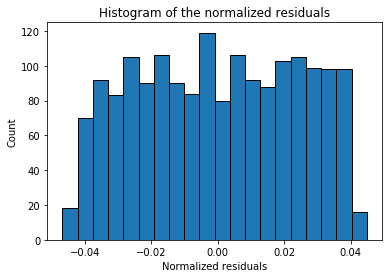

In [80]:
model.histogram_resid()

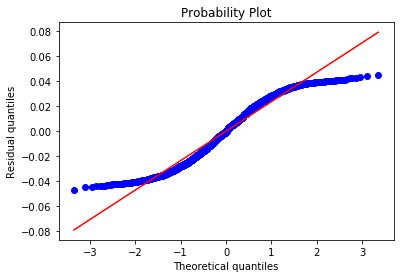

In [81]:
model.qqplot_resid()

In [83]:
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  d180N   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              839.7
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                        0.00
Time:                        06:30:03   Log-Likelihood:                         -1060.4
No. Observations:                1742   AIC:                                      2135.
Df Residuals:                    1735   BIC:                                      2173.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Parameters:  Age         0.000944
d180       -0.374606
L*          0.472494
SST        -0.276009
Alkane      0.040904
Alkanol     0.359305
Sediment   -0.007685
dtype: float64
Standard errors:  Age         0.000032
d180        0.014539
L*          0.014931
SST         0.024353
Alkane      0.018697
Alkanol     0.023183
Sediment    0.011230
dtype: float64
Predicted values:  [-3.40037095 -2.07444858 -0.70618359 ...  1.85012174  1.78418012
  1.56033564]


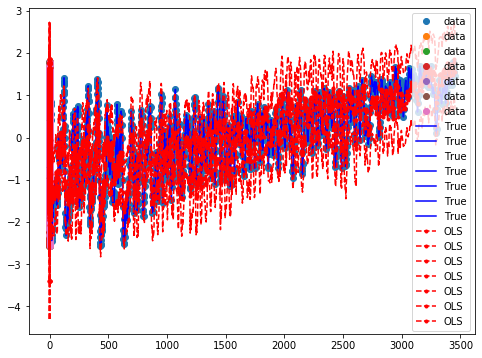

In [87]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
ax.plot(X, y, 'b-', label="True")
ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');